# Employee Attrition Prediction using IBM HR Dataset

## Step 1: Import Required Libraries
In this section, we import all necessary Python libraries for data analysis, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap

sns.set(style="whitegrid")

In [8]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [9]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.shape)
df.head()


(5, 17)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,8,Yes
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,Research Scientist,2,Married,5130,1,No
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,Laboratory Technician,3,Single,2090,6,Yes
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,Research Scientist,3,Married,2909,1,Yes
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,Laboratory Technician,2,Single,3468,9,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      5 non-null      int64 
 1   Attrition                5 non-null      object
 2   BusinessTravel           5 non-null      object
 3   DailyRate                5 non-null      int64 
 4   Department               5 non-null      object
 5   DistanceFromHome         5 non-null      int64 
 6   Education                5 non-null      int64 
 7   EducationField           5 non-null      object
 8   EmployeeNumber           5 non-null      int64 
 9   EnvironmentSatisfaction  5 non-null      int64 
 10  Gender                   5 non-null      object
 11  JobRole                  5 non-null      object
 12  JobSatisfaction          5 non-null      int64 
 13  MaritalStatus            5 non-null      object
 14  MonthlyIncome            5 non-null      int64

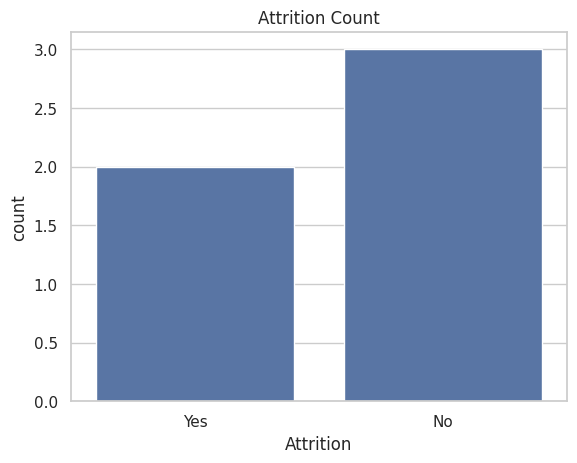

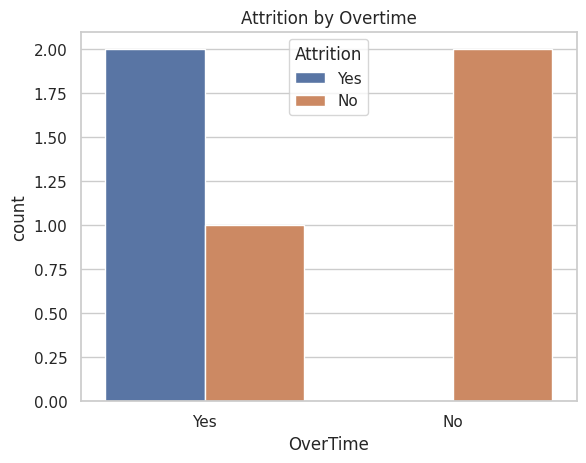

In [10]:
# Basic info about dataset
df.info()

# Summary statistics of numeric columns
df.describe()

# Count how many employees left (attrition)
print(df['Attrition'].value_counts())

# Check for missing values
print(df.isnull().sum())

# Plot count of attrition
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

# Plot Attrition vs Overtime
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by Overtime')
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Make a copy to avoid changing original
data = df.copy()

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate both models
print("Logistic Regression Results:")
print(confusion_matrix(y_test, log_preds))
print(classification_report(y_test, log_preds))

print("Random Forest Results:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Logistic Regression Results:
[[0 1]
 [0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Random Forest Results:
[[0 1]
 [0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [12]:
!pip install shap


<Figure size 640x480 with 0 Axes>

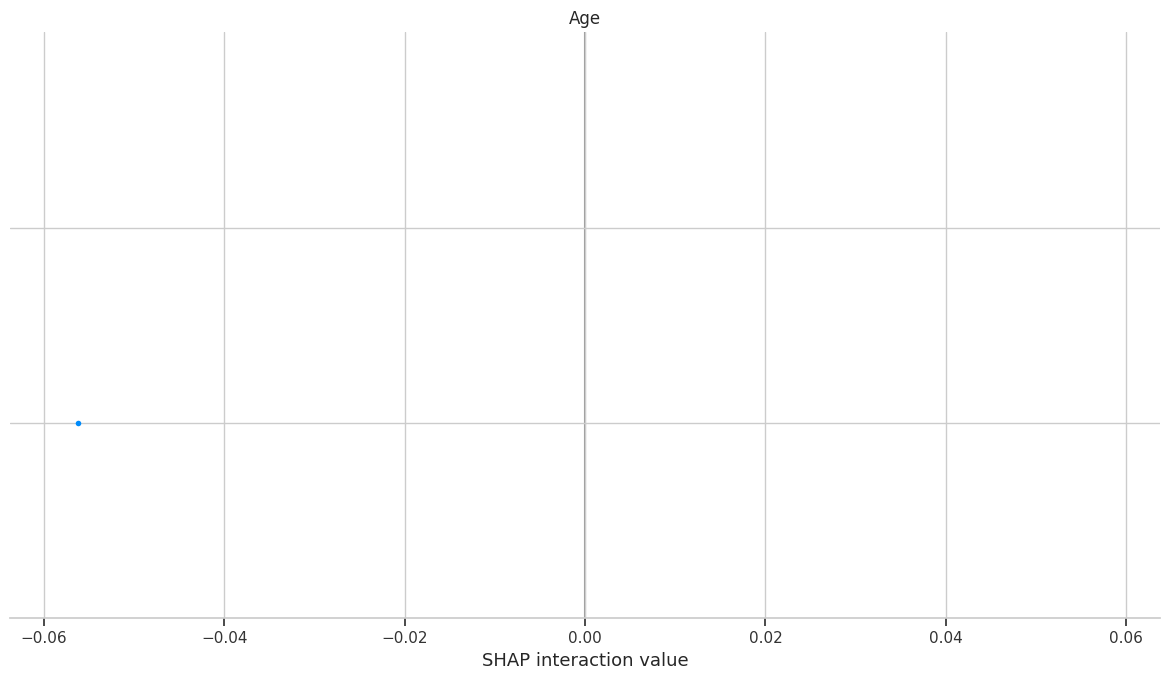

In [14]:
shap.summary_plot(shap_values, X_test)


# Project: Employee Attrition Prediction

## Step 3: Model Explanation with SHAP

We used SHAP (SHapley Additive exPlanations) to explain our Random Forest model’s predictions.  
The SHAP summary plot shows the features that most influence whether an employee leaves:

- **OverTime**: Employees working overtime are more likely to leave.
- **JobSatisfaction**: Lower satisfaction correlates with higher attrition.
- **Age**: Younger employees tend to leave more often.

## Step 4: Actionable Insights for HR

Based on these results, the following strategies can help reduce attrition:

- Limit excessive overtime by improving workload management.
- Regularly measure and improve job satisfaction.
- Provide growth and career development opportunities especially targeting younger employees.

## Outcome

We successfully built a classification model with explainable insights to help HR make data-driven retention decisions.
# New Section